# 1. Seaborn Introduction
**Introduction to the Seaborn library and where it fits in the Python visualization landscape.**

## Introduction to Seaborn

### Matplotlib
- `matplotlib` provides the raw building blocks for Seaborn's visualizations
- It can also be used on its own to plot data

```python
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('csv_file.csv')
fig, ax = plt.subplots()
ax.hist(df['column_name'])
```

### Pandas
- `pandas` is a foundation library for analyzing data
- It also supports basic plotting capability

```python
import pandas as pd
df = pd.read_csv('csv_file.csv')
```

### Seaborn
- Seaborn supports complex visualizations of data
- It is built on matplotlib and works best with pandas' dataframes
- The `displot` is similar to the histogram
- By default, generates a Gaussian Kernel Density Estimate (KDE)

```python
import seaborn as sns
sns.distplot(df['column_name'])
```

### Histogram vs. Distplot
Pandas histogram | Seaborn distplot
:---|:---
`df = pd.read_csv('csv_file.csv')` | `sns.distplot(df['column_name'])`
-Actual frequency of observatoins<br />-No automatic labels<br />-Wide bins | -Automatic label on x axis<br />-Muted color palette<br />-KDE plot<br />-Narrow bins

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Comparing a histogram and distplot

In this exercise, you will be looking at data from US School Improvement Grants in 2010. This program gave nearly $4B to schools to help them renovate or improve their programs.

In [15]:
grants = pd.read_csv('schoolimprovement2010grants.csv')
grants.head(3)

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West


Seaborn generally does more statistical analysis on data and can provide more sophisticated insight into the data. In this exercise, we will compare a `pandas` histogram vs the `seaborn` distplot.

- Use the pandas' `plot.hist()` function to plot a histogram of the `Award_Amount` column.

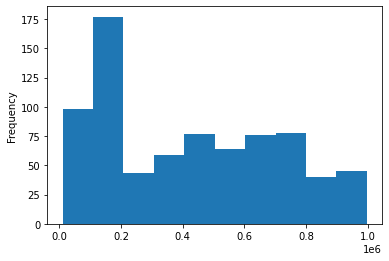

<Figure size 432x288 with 0 Axes>

In [16]:
# Display pandas histogram
grants['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

- Use Seaborn's `distplot()` function to plot a distribution plot of the same column.

C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


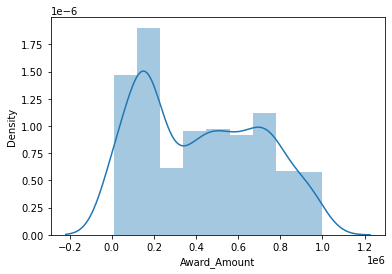

<Figure size 432x288 with 0 Axes>

In [17]:
# Display a Seaborn distplot
sns.distplot(grants['Award_Amount'])
plt.show()

# Clear the distplot
plt.clf()

*Notice how the pandas and Seaborn plots are complementary. They both show the distribution of data in different formats*

---

## Using the distribution plot

### Creating a histogram
- Displot function has multiple optional arguments
- In order to plot a simple histogram, you can disable the KDE and specify the number of bins to use

```python
sns.distplot(df['column_name'], kde=False, bins=10)
```

### Alternative data distributions
- A rug plot is an alternative way to view the distribution of data
- A KDE curve and rug plot can be combined

```python
sns.distplot(df['column_name'], hist=False, rug=True)
```

### Further Customizations
- The `displot` function uses several functions including `kdeplot` and `rugplot`
- It is possible to further customize a plot by passing arguments to the underlying function

```python
sns.displot(df['column_name'], hist=False, rug=True, kde_kws={'shade':True})
```

## Plot a histogram

The `distplot()` function will return a Kernel Density Estimate (KDE) by default. The KDE helps to smooth the distribution and is a useful way to look at the data. However, Seaborn can also support the more standard histogram approach if that is more meaningful for your analysis.

- Create a `distplot` for the data and disable the KDE.
- Explicitly pass in the number 20 for the number of bins in the histogram.
- Display the plot using `plt.show()`.

C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


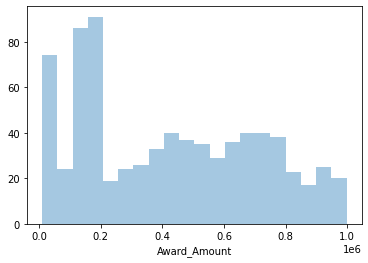

In [9]:
# Create a distplot
sns.distplot(df['Award_Amount'], kde=False, bins=20)

# Display the plot
plt.show()

*The `distplot()` function can be configured with multiple different arguments. By disabling the KDE output, you have created a histogram.*

## Rug plot and kde shading
Now that you understand some function arguments for `distplot()`, we can continue further refining the output. This process of creating a visualization and updating it in an incremental fashion is a useful and common approach to look at data from multiple perspectives.

Seaborn excels at making this process simple.

- Create a `distplot` of the `Award_Amount` column in the `df`.
- Configure it to show a shaded kde (using the `kde_kws` dictionary).
- Add a rug plot above the x axis.
- Display the plot.

C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


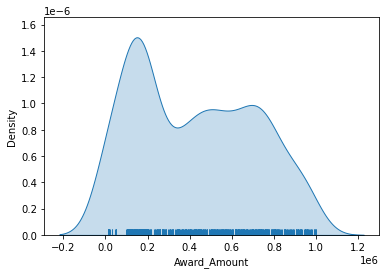

In [13]:
# Create a distplot of the Award Amount
sns.distplot(df['Award_Amount'], hist=False, rug=True, kde_kws={'shade':True})

# Plot the results
plt.show()

*This plot can be really useful for understanding how the award dollars were distributed.*

*375 of the 757 awards are <= $400k. This insight could be useful for further analysis.*

---

## Regression Plots in Seaborn
The previous analysis we performed is often referred to as univariate analysis because we only look at one variable. Regression analysis is bivariate because we are looking for relationships between two variables.

### Introduction to regplot
- The `regplot` function generates a scatter plot with a regression line
- Usage is similar to the `distplot`
- The `data` and `x` and `y` variables must be defined

```python
sns.regplot(x='column_name_1', y='column_name_2', data=df)
```

### lmplot() builds on top of the base regplot()
In the previous exercises, we looked at distplots and briefly discussed kde plots as a building block for the more robust `distplot()`. In a similar manner, the **lower level** `regplot()` and **higher level** `lmplot()` are related. They are called the same way and produce similar output. However, the `lmplot()` is much more powerful. 

### lmplot faceting
The use of hue and columns is a powerful concept that is present throughout many of Seaborn's functions. The use of plotting multiple graphs while changing a single variable is often called **faceting**. Faceting can be accomplished by using the `lmplot()` function. The base function is very similar to `regplot()` but it provides much more power by allowing you to add additional information using columns, colors, or rows. There are an entire class of functions in Seaborn that support this type of faceting.
- Organize data by colors (`hue`)

```python
sns.lmplot(x='column_1', y='column_2', data=df, hue='type')
```

- Organize data by columns (`col`)

```python
sns.lmplot(x='column_1', y='column_2', data=df, col='type')
```

### Create a regression plot
For this set of exercises, we will be looking at FiveThirtyEight's data on which US State has the worst drivers. The data set includes summary level information about fatal accidents as well as insurance premiums for each state as of 2010.

In this exercise, we will look at the difference between the regression plotting functions.

In [19]:
ins_premiums = pd.read_csv('insurance_premiums.csv')

- Create a regression plot using `regplot()` with `"insurance_losses"` on the x axis and `"premiums"` on the y axis.
- Display the plot.

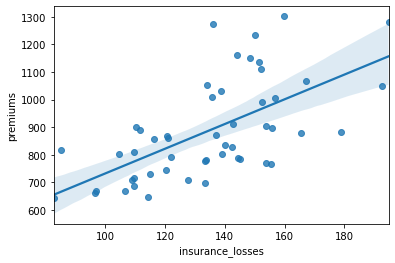

In [20]:
# Create a regression plot of premiums vs. insurance_losses
sns.regplot(x='insurance_losses', y='premiums', data=ins_premiums)

# Display the plot
plt.show()

- Create a regression plot of `"premiums"` versus `"insurance_losses"` using `lmplot()`.
- Display the plot.

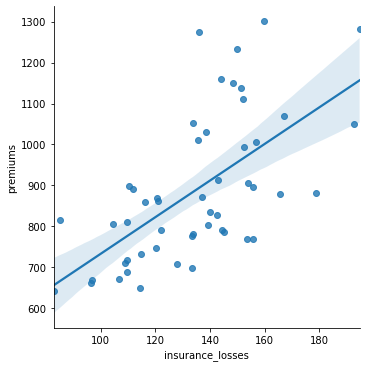

In [22]:
# Create an lmplot of premiums vs. insurance_losses
sns.lmplot(x='insurance_losses', y='premiums', data=ins_premiums)

# Display the second plot
plt.show()

*Notice how the output looks similar.*

## Plotting multiple variables
Since we are using `lmplot()` now, we can look at the more complex interactions of data. This data set includes geographic information by state and area. It might be interesting to see if there is a difference in relationships based on the `Region` of the country.

- Use `lmplot()` to look at the relationship between `insurance_losses` and `premiums`.
- Plot a regression line for each `Region` of the country.

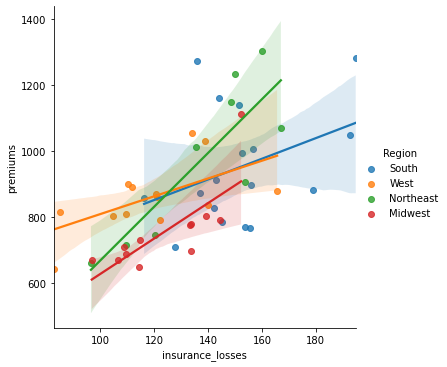

In [25]:
sns.lmplot(x='insurance_losses', y='premiums', data=ins_premiums, hue='Region')

plt.show()

*The results are bit difficult to read. Maybe using multiple lines is not the best approach.*

## Facetting multiple regressions
`lmplot()` allows us to facet the data across multiple rows and columns. In the previous plot, the multiple lines were difficult to read in one plot. We can try creating multiple plots by `Region` to see if that is a more useful visualization.

- Use `lmplot()` to look at the relationship between `insurance_losses` and `premiums`.
- Create a plot for each `Region` of the country.
- Display the plots across multiple rows.

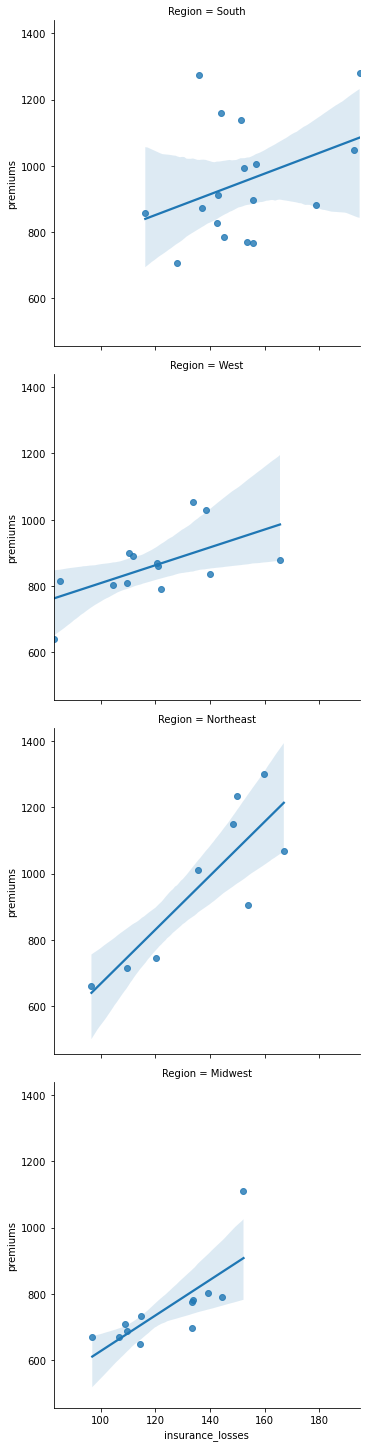

In [27]:
sns.lmplot(x='insurance_losses', y='premiums', data=ins_premiums, row='Region')

plt.show()

*Faceting the data across multiple rows or columns can be a good way to see variable interactions in the data. The lmplot function supports plotting regression data by column, row and hue. This concept is used repeatedly throughout Seaborn.*